# Importing Libraries

In [800]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
import joblib

In [945]:
#Loading Data
data=pd.read_csv("loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# EDA

In [805]:
data.shape

(4269, 13)

In [948]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [807]:
data.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [809]:
data.duplicated().sum()

0

In [811]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [813]:
data.columns=data.columns.str.strip()
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [815]:
data["loan_id"].unique()

array([   1,    2,    3, ..., 4267, 4268, 4269], dtype=int64)

In [817]:
data["no_of_dependents"].unique()

array([2, 0, 3, 5, 4, 1], dtype=int64)

In [819]:
data["education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [821]:
data["self_employed"].unique()

array([' No', ' Yes'], dtype=object)

In [823]:
data["education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [825]:
data["income_annum"].unique()

array([9600000, 4100000, 9100000, 8200000, 9800000, 4800000, 8700000,
       5700000,  800000, 1100000, 2900000, 6700000, 5000000, 1900000,
       4700000,  500000, 2700000, 6300000, 5800000, 6500000, 4900000,
       3100000, 2400000, 7000000, 9000000, 8400000, 1700000, 1600000,
       8000000, 3600000, 1500000, 7800000, 1400000, 4200000, 5500000,
       9500000, 7300000, 3800000, 5100000, 4300000, 9300000, 7400000,
       8500000, 8800000, 3300000, 3900000, 8300000, 5600000, 5300000,
       2600000,  700000, 3500000, 9900000, 3000000, 6800000, 2000000,
       1000000,  300000, 6600000, 9400000, 4400000,  400000, 6200000,
       9700000, 7100000,  600000, 7200000,  900000,  200000, 1800000,
       4600000, 2200000, 2500000, 8600000, 4000000, 5200000, 8900000,
       1300000, 4500000, 8100000, 9200000, 2800000, 7500000, 6400000,
       6900000, 7700000, 3200000, 7900000, 5900000, 3400000, 2100000,
       3700000, 5400000, 2300000, 7600000, 6000000, 6100000, 1200000],
      dtype=int64)

In [827]:
data["loan_amount"].unique()

array([29900000, 12200000, 29700000, 30700000, 24200000, 13500000,
       33000000, 15000000,  2200000,  4300000, 11200000, 22700000,
       11600000, 31500000,  7400000, 10700000,  1600000,  9400000,
       10300000, 14600000, 19400000, 14000000, 25700000,  1400000,
        9800000,  9500000, 28100000,  5600000, 24000000, 25300000,
       12000000, 22000000, 11900000,  3400000,  6200000, 27200000,
        7700000,  5100000, 18100000, 24900000,  2300000, 13400000,
       27800000, 19100000, 20500000, 25400000, 24700000,  7600000,
       23000000, 19700000, 24500000, 10600000, 30500000, 18400000,
       18200000, 18900000, 28900000,  7500000, 12300000, 29100000,
       10100000, 12400000,  5000000,  1500000, 18600000, 18300000,
       16700000,  8400000,  6500000, 14800000, 33500000, 29400000,
        8900000, 31200000, 21200000,  8600000,  8200000,  3800000,
       28300000,  8000000, 37600000, 21100000, 20700000,  6400000,
        2000000,  1100000, 25000000, 10800000,   900000, 12900

In [829]:
data["loan_term"].unique()

array([12,  8, 20, 10,  4,  2, 18, 16, 14,  6], dtype=int64)

In [831]:
data["cibil_score"].unique()

array([778, 417, 506, 467, 382, 319, 678, 782, 388, 547, 538, 311, 679,
       469, 794, 663, 780, 736, 652, 315, 530, 551, 324, 514, 696, 662,
       336, 850, 313, 363, 436, 830, 612, 691, 636, 348, 352, 712, 822,
       540, 342, 787, 331, 677, 634, 502, 435, 689, 657, 590, 818, 431,
       841, 421, 797, 478, 669, 365, 586, 784, 364, 715, 693, 777, 312,
       340, 386, 418, 735, 494, 671, 697, 801, 576, 639, 470, 826, 613,
       713, 439, 387, 402, 837, 641, 489, 844, 452, 366, 300, 861, 562,
       463, 702, 618, 633, 764, 591, 719, 317, 302, 879, 437, 456, 647,
       379, 717, 545, 570, 865, 821, 859, 395, 429, 565, 357, 465, 479,
       425, 786, 564, 501, 727, 894, 829, 802, 543, 772, 572, 709, 481,
       306, 415, 548, 701, 890, 704, 318, 761, 524, 681, 737, 638, 656,
       341, 371, 886, 748, 376, 873, 309, 869, 534, 566, 742, 824, 575,
       766, 888, 622, 458, 327, 682, 583, 816, 455, 355, 389, 870, 827,
       768, 707, 665, 420, 471, 819, 809, 744, 484, 673, 695, 47

In [833]:
data["residential_assets_value"].unique()

array([ 2400000,  2700000,  7100000, 18200000, 12400000,  6800000,
       22500000, 13200000,  1300000,  3200000,  8100000, 15300000,
        6400000, 10800000,  1900000,  5700000,  2900000,  1000000,
       10300000,  9500000,  3800000, 13100000,   900000,  7900000,
       11500000,  4500000,  2300000, 21800000, 20200000,  3600000,
         700000,  9700000,  3400000,  7000000,   100000,  8600000,
       22300000,   200000,  2200000, 13000000,  5400000,   800000,
         500000,  8700000, 15400000,  7400000,  1200000,  2100000,
       19300000, 18500000,  -100000, 23800000,  4700000, 24400000,
        1600000,  7600000,  6100000,  5500000,  4000000, 18400000,
        3900000,  6500000,   600000, 14300000, 11600000, 17600000,
       25500000,  9400000,  5300000, 17100000, 20400000,  5100000,
       24100000, 19200000,  9100000, 14700000, 25900000,   300000,
       11400000,  7800000, 19600000,  5600000,  7300000, 19500000,
       16100000,  1500000, 12700000, 26800000, 12200000,   400

In [835]:
data["commercial_assets_value"].unique()

array([17600000,  2200000,  4500000,  3300000,  8200000,  8300000,
       14800000,  5700000,   800000,  1400000,  4700000,  5800000,
        9600000, 16600000,  1200000,  3900000,   100000,  2800000,
              0,  3500000,  1600000, 11300000,  1700000,   600000,
        8700000,  3100000, 10600000,  4200000, 11900000, 12400000,
        5200000,  7400000,   200000,   700000,   300000,  1300000,
       11200000, 12100000,  1500000,  6300000,  6900000,  9100000,
        8600000, 10500000,  1800000,  9300000,  5600000, 10300000,
        4900000, 16300000,  1900000,  6100000,  9700000, 11700000,
        9400000,  3800000,  2500000,  7800000,  8900000,   500000,
       11400000, 13600000,  2600000,  4300000,  3200000,  1100000,
         400000,  4800000,  8500000, 15200000,  3600000, 16500000,
        2700000,  7600000,  6000000, 12200000,  2000000,  1000000,
        6200000,  8000000,  5900000,  4100000,  6500000, 10000000,
       16700000,   900000,  2100000,  9500000,  5500000,  4400

In [837]:
data["luxury_assets_value"].unique()

array([22700000,  8800000, 33300000, 23300000, 29400000, 13700000,
       29200000, 11800000,  2800000,  3300000,  9500000, 20400000,
       14600000, 20900000,  5900000, 16400000,  1300000,  6700000,
        6200000, 23500000, 18000000, 22200000, 19500000,  1100000,
       10000000,  6600000, 25300000,  5400000, 27500000, 33700000,
       25500000, 21700000,  2200000, 19900000, 19000000,  6000000,
        5300000, 16700000,  5600000, 31000000,  3900000,  1800000,
       16200000, 21400000,  8700000, 17700000, 18500000, 37700000,
       20500000, 21800000,  9300000, 31900000, 19400000, 16300000,
       34600000, 17500000, 18600000, 25900000, 26500000, 27400000,
       10500000, 13100000, 14900000, 24100000,  4900000,  1900000,
       11900000, 21500000, 12600000,  4800000, 12900000, 35400000,
       25200000,  2400000, 12300000, 26600000, 10300000, 11000000,
        3800000, 27900000, 23400000, 12500000, 22400000,  3200000,
         700000, 18200000, 23200000, 36400000, 13800000,  1200

In [839]:
data["bank_asset_value"].unique()

array([ 8000000,  3300000, 12800000,  7900000,  5000000,  5100000,
        4300000,  6000000,   600000,  1600000,  3100000,  6400000,
        1900000,  4400000,   700000,  5900000,  6100000,  5400000,
        8500000,   300000,  2600000,  7200000,  2500000,  9700000,
        9300000,  1000000,  5800000,   900000,  1400000,  7100000,
        2900000,  9000000,  5200000,   800000, 10900000,  4900000,
        6500000,  8200000, 11700000, 10500000, 11300000,  3400000,
        6200000,  8700000,  4100000,  4800000, 11400000,  4700000,
        2800000, 11900000,  5500000,  2400000,  4200000,  7600000,
        5600000,  2000000,  1100000,  6300000, 11100000,  8600000,
        6800000,  3600000, 10200000, 12700000,  2100000,  1300000,
         400000,  7000000,  7300000,   100000,   200000, 11600000,
        1800000,  9800000,  8100000,  7500000, 13400000,  9600000,
        3800000,  8400000,  3200000,  1200000,  4600000,  8300000,
        4500000,  3500000,  2300000,  7400000,  1700000,  9500

In [841]:
data["loan_status"].unique()

array([' Approved', ' Rejected'], dtype=object)

# Data Visualization

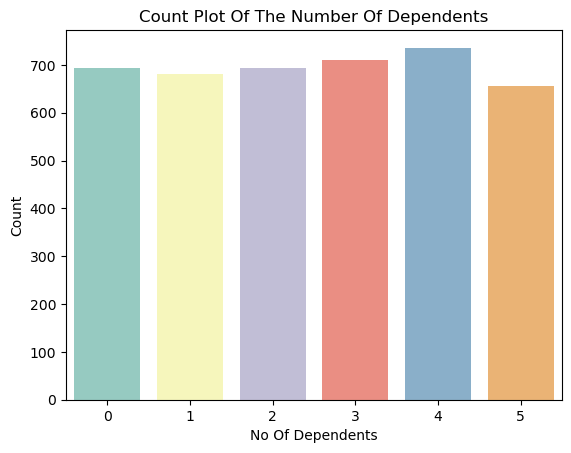

In [943]:
#Checking Dependents Distribution
sns.countplot(data=data,x="no_of_dependents",palette="Set3")
plt.title("Count Plot Of The Number Of Dependents")
plt.xlabel("No Of Dependents")
plt.ylabel("Count")
plt.show()

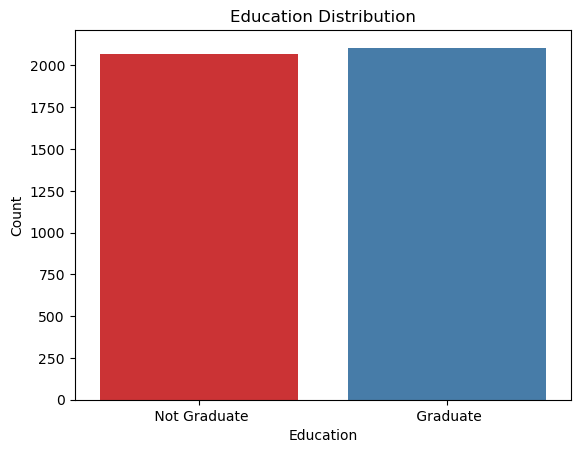

In [941]:
#Checking Education Distribution
sns.countplot(data=data,x="education",palette="Set1")
plt.title("Education Distribution")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

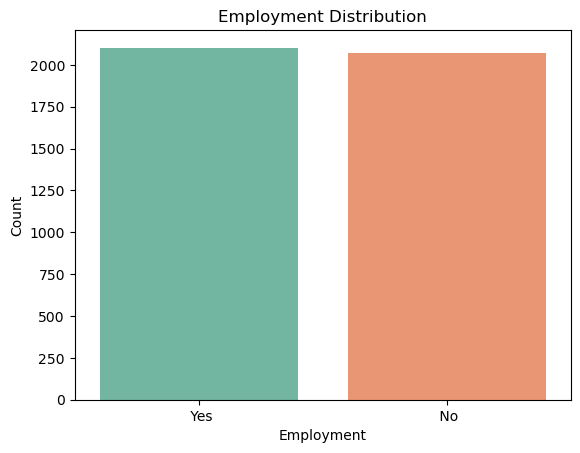

In [937]:
#Checking Employment Distribution
sns.countplot(data=data,x="self_employed",palette="Set2")
plt.title("Employment Distribution")
plt.xlabel("Employment")
plt.ylabel("Count")
plt.show()

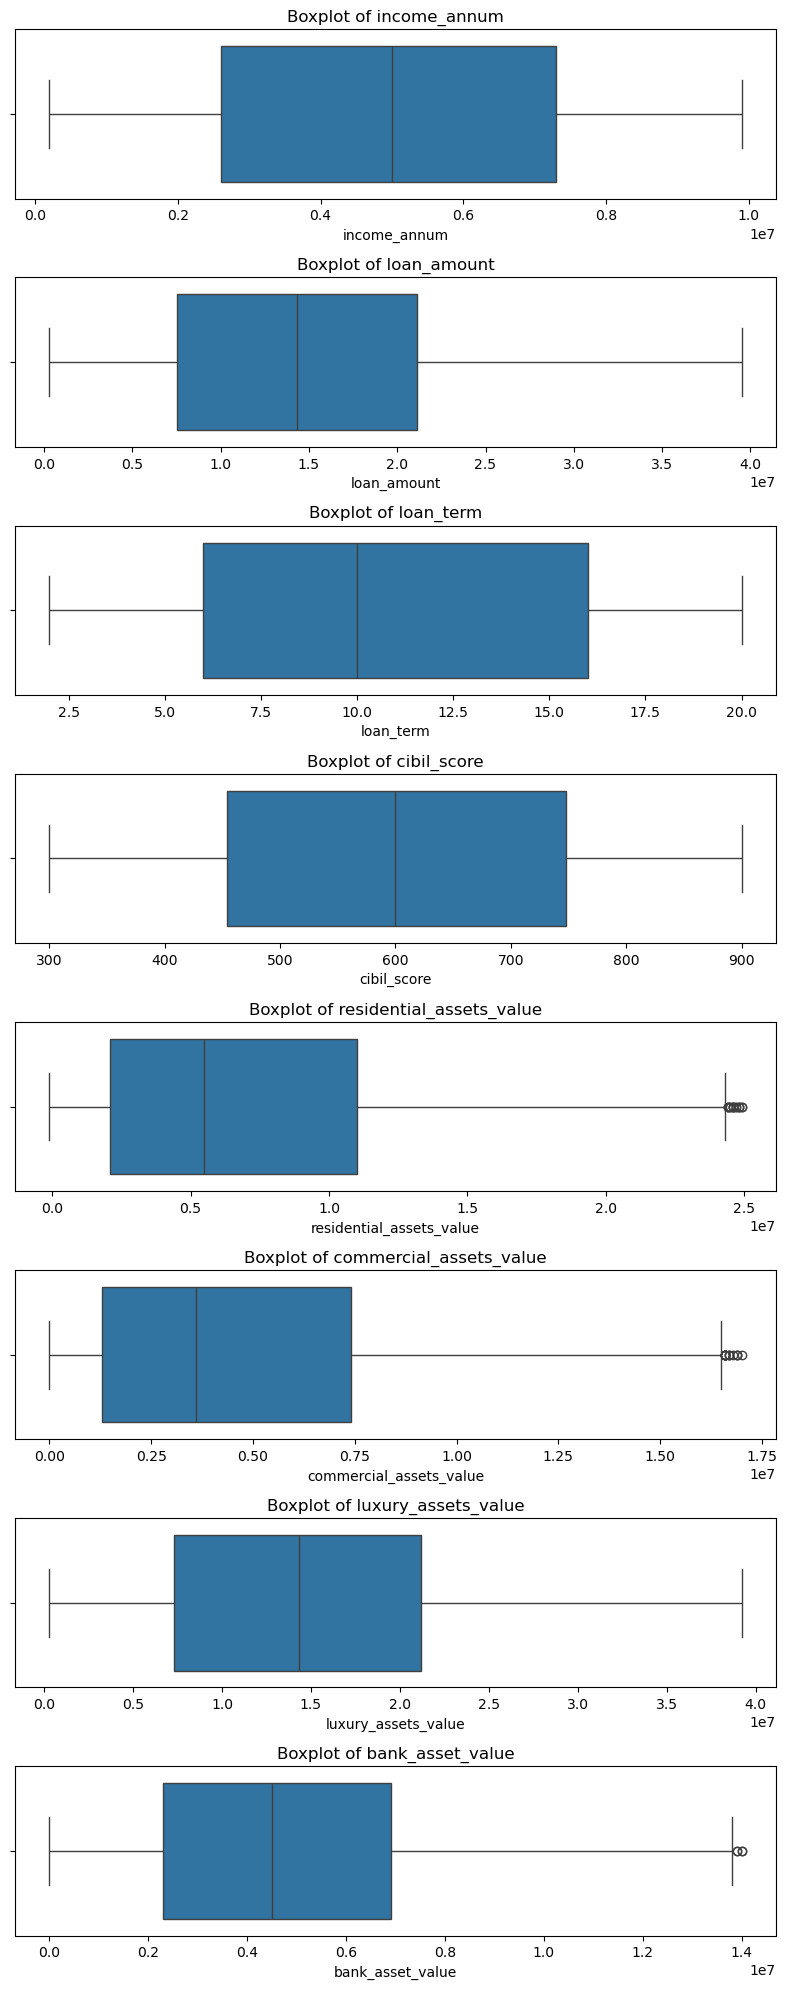

In [935]:
#Boxplot For Checking Outliers
numeric_col = [
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'
]

plt.figure(figsize=(8, 20)) 
for i, col in enumerate(numeric_col, 1):
    plt.subplot(len(numeric_col), 1, i)  
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    
plt.tight_layout()
plt.show()


In [851]:
#Outlier Removal
outlier_cols=[  'residential_assets_value', 'commercial_assets_value', 'bank_asset_value']
for col in outlier_cols:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    data=data[ (data[col]>=lower) & (data[col]<=upper) ]
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


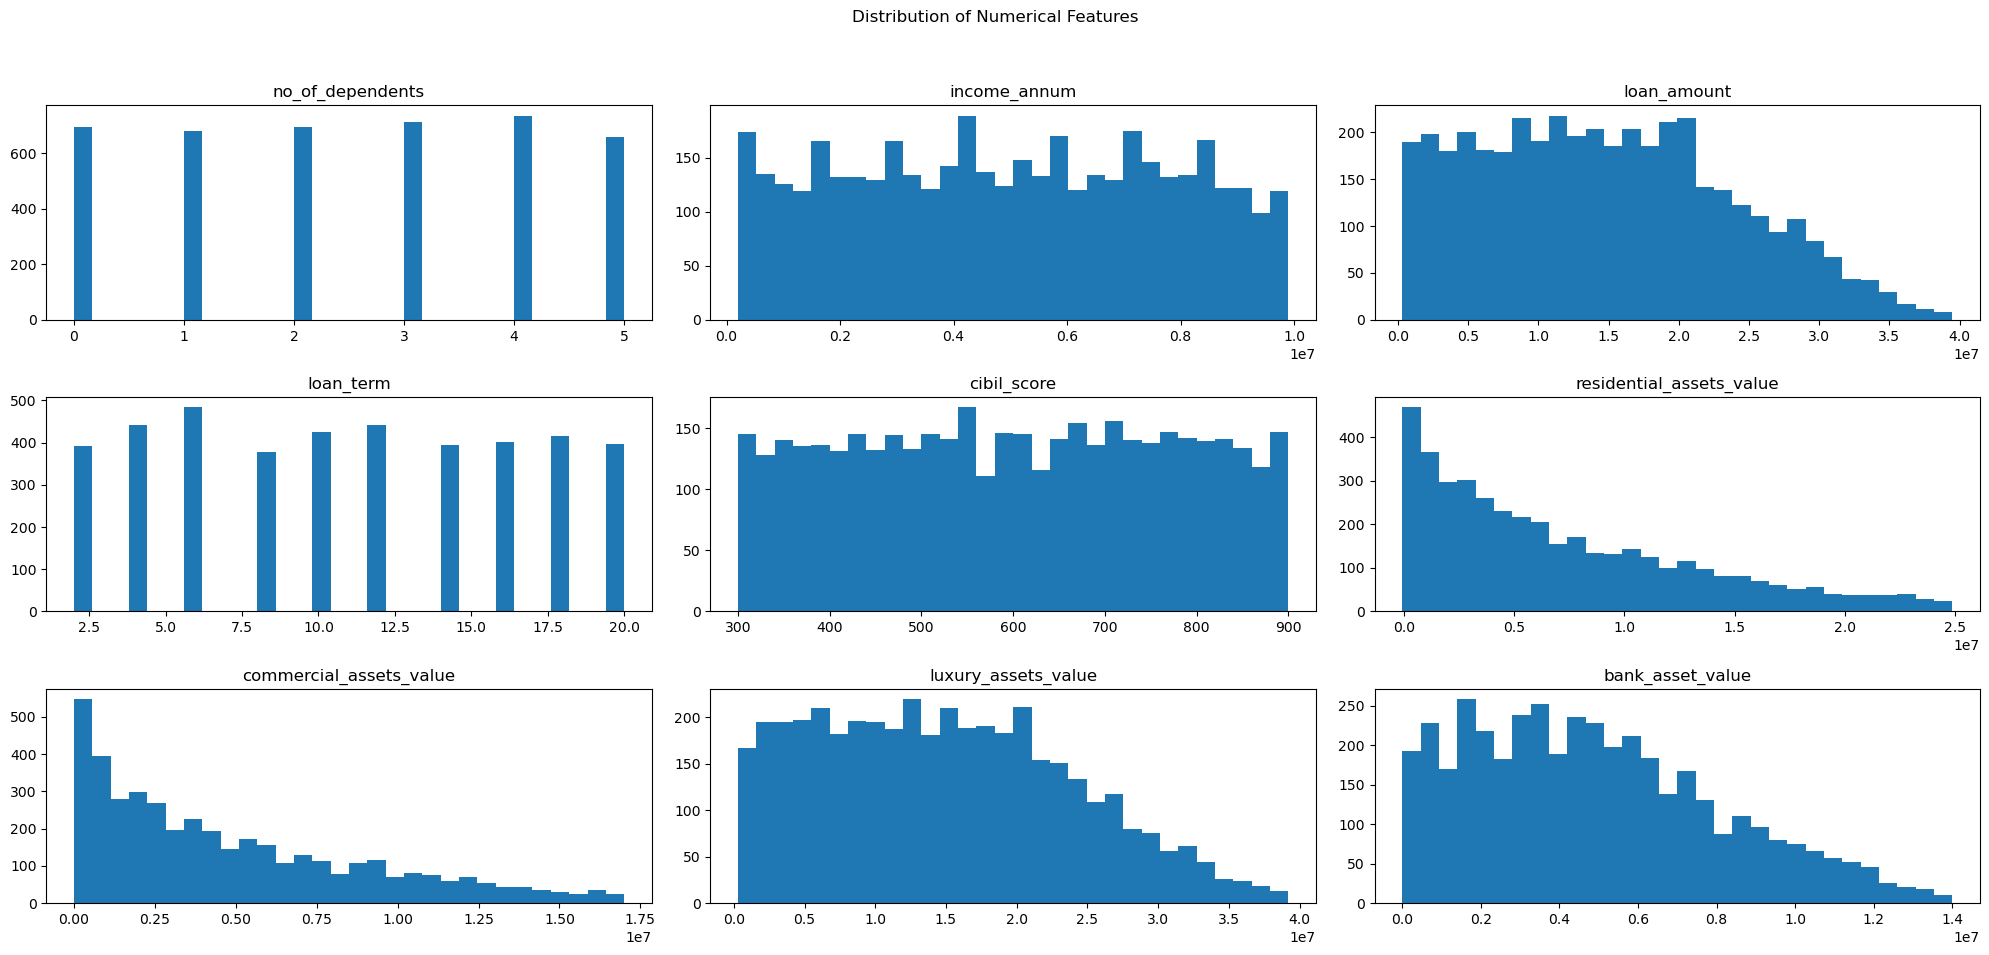

In [933]:
#Histplot For Numerical Columns
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

if 'loan_id' in numerical_columns:
    numerical_columns.remove('loan_id')

data[numerical_columns].hist(bins=30, figsize=(20, 10), layout=(3, 3),grid=False)
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

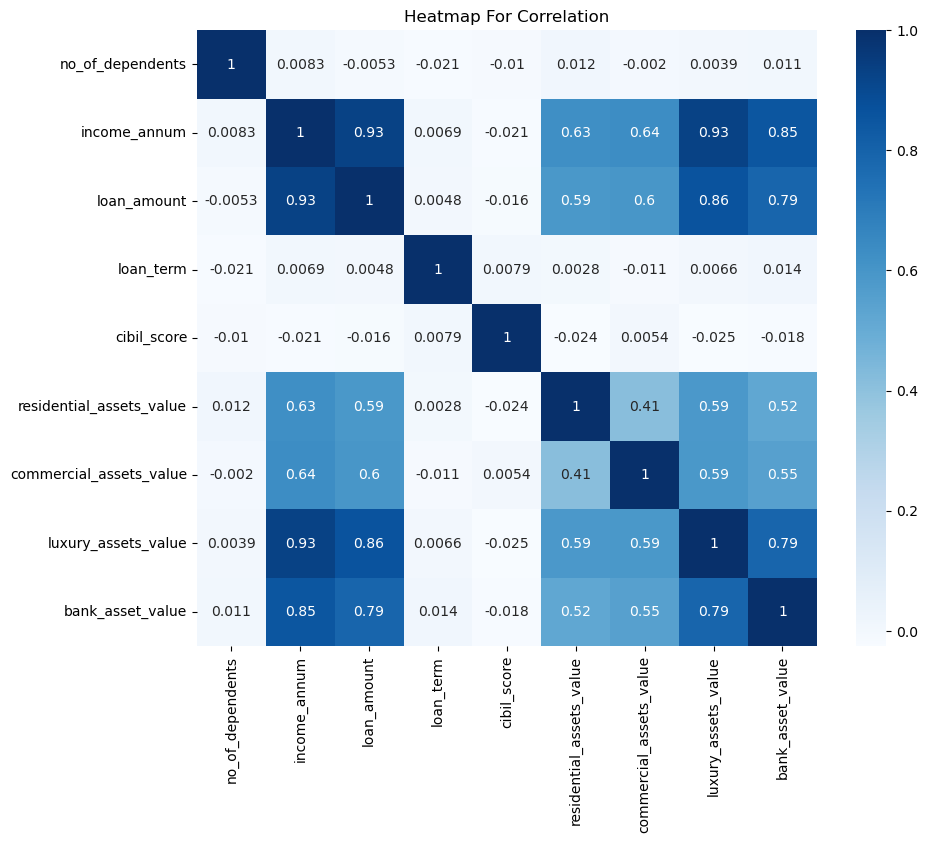

In [927]:
#Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data[numerical_columns].corr(),annot=True,cmap="Blues")
plt.title("Heatmap For Correlation")
plt.show()

In [858]:
#Selecting Features
X=data.drop(["loan_status","loan_id"],axis=1)
y=data["loan_status"]

In [925]:
#Splitng The Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [862]:
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64","float64"]).columns

In [923]:
#Preporcessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)

# Logistic Regression

In [921]:
#Model Pipeline
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [747]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['education', 'self_employed'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [748]:
y_pred_train=lr_pipeline.predict(X_train)

In [915]:
#Evaluation Metrics
print("Accuracy:",accuracy_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, average="weighted"))
print("Recall:", recall_score(y_train, y_pred_train, average="weighted"))
print("F1-Score:", f1_score(y_train, y_pred_train, average="weighted"))

# More detailed report
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      1819
    Rejected       1.00      1.00      1.00      1102

    accuracy                           1.00      2921
   macro avg       1.00      1.00      1.00      2921
weighted avg       1.00      1.00      1.00      2921



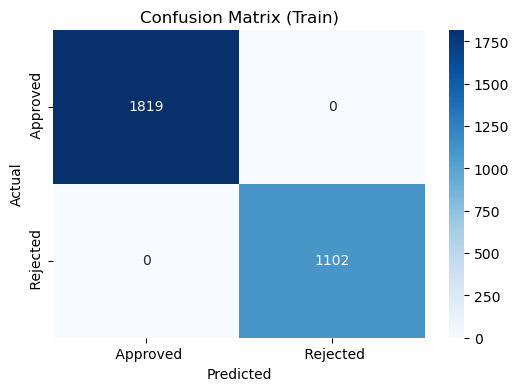

In [913]:
#Confusion Matrix
cm=confusion_matrix(y_train,y_pred_train)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=pipeline.classes_, 
            yticklabels=pipeline.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Train)")
plt.show()

In [751]:
y_pred_test = lr_pipeline.predict(X_test)

In [911]:
#Evaluation Metrics
acc_lr_test=accuracy_score(y_test, y_pred_test)
pr_lr_test= precision_score(y_test, y_pred_test, average="weighted")
rec_lr_test= recall_score(y_test, y_pred_test, average="weighted")
f1_lr_test= f1_score(y_test, y_pred_test, average="weighted")
print("Accuracy:",acc_lr_test)
print("Precision:",pr_lr_test)
print("Recall:",rec_lr_test)
print("F1-Score:",f1_lr_test)

# More detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.9728434504792333
Precision: 0.9728184773540776
Recall: 0.9728434504792333
F1-Score: 0.9728203976320589

Classification Report:
               precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       780
    Rejected       0.97      0.96      0.96       472

    accuracy                           0.97      1252
   macro avg       0.97      0.97      0.97      1252
weighted avg       0.97      0.97      0.97      1252



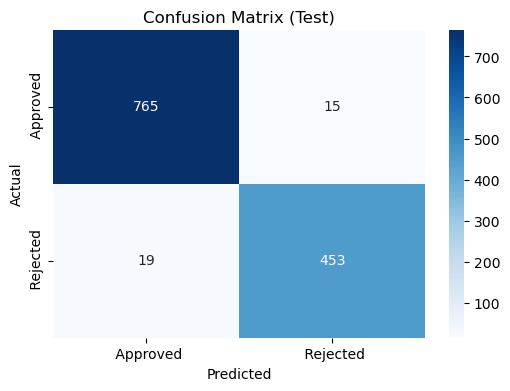

In [909]:
#Confusion Martix
cm=confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=pipeline.classes_, 
            yticklabels=pipeline.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test)")
plt.show()

# Decision Tree

In [907]:
#Model Pipeline
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier",DecisionTreeClassifier())
])

In [756]:
dt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['education', 'self_employed'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [757]:
y_pred_train=dt_pipeline.predict(X_train)

In [905]:
#Evaluation Metrics
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, average="weighted"))
print("Recall:", recall_score(y_train, y_pred_train, average="weighted"))
print("F1-Score:", f1_score(y_train, y_pred_train, average="weighted"))

# More detailed report
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      1819
    Rejected       1.00      1.00      1.00      1102

    accuracy                           1.00      2921
   macro avg       1.00      1.00      1.00      2921
weighted avg       1.00      1.00      1.00      2921



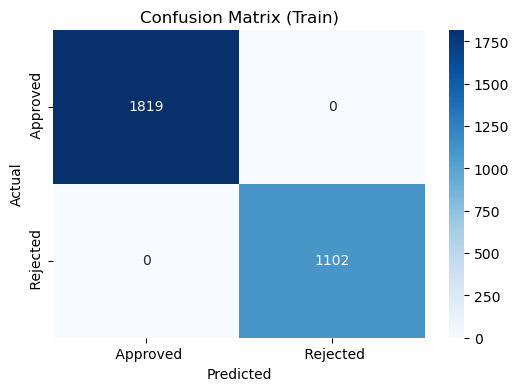

In [903]:
#Confusion Matrix
cm=confusion_matrix(y_train,y_pred_train)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=pipeline.classes_, 
            yticklabels=pipeline.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Train)")
plt.show()

In [760]:
y_pred_test=dt_pipeline.predict(X_test)

In [901]:
#Evaluation Metrics
acc_dt_test=accuracy_score(y_test, y_pred_test)
pr_dt_test= precision_score(y_test, y_pred_test, average="weighted")
rec_dt_test= recall_score(y_test, y_pred_test, average="weighted")
f1_dt_test= f1_score(y_test, y_pred_test, average="weighted")
print("Accuracy:",acc_dt_test)
print("Precision:",pr_dt_test)
print("Recall:",rec_dt_test)
print("F1-Score:",f1_dt_test)

# More detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.9728434504792333
Precision: 0.9728184773540776
Recall: 0.9728434504792333
F1-Score: 0.9728203976320589

Classification Report:
               precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       780
    Rejected       0.97      0.96      0.96       472

    accuracy                           0.97      1252
   macro avg       0.97      0.97      0.97      1252
weighted avg       0.97      0.97      0.97      1252



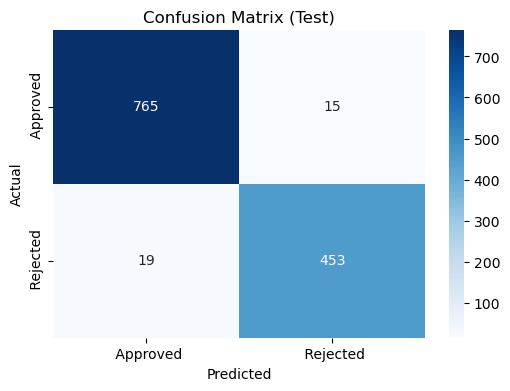

In [899]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=pipeline.classes_, 
            yticklabels=pipeline.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test)")
plt.show()

# Random Forest

In [897]:
#Model Pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier",RandomForestClassifier())
])

In [765]:
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['education', 'self_employed'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [766]:
y_pred_train=rf_pipeline.predict(X_train)

In [895]:
#Evaluation Metrics
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, average="weighted"))
print("Recall:", recall_score(y_train, y_pred_train, average="weighted"))
print("F1-Score:", f1_score(y_train, y_pred_train, average="weighted"))

# More detailed report
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      1819
    Rejected       1.00      1.00      1.00      1102

    accuracy                           1.00      2921
   macro avg       1.00      1.00      1.00      2921
weighted avg       1.00      1.00      1.00      2921



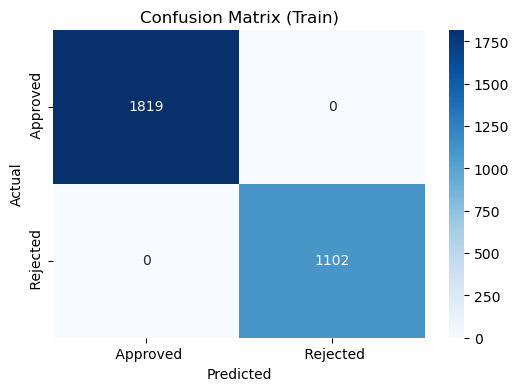

In [893]:
#Confusion Matrix
cm=confusion_matrix(y_train,y_pred_train)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=pipeline.classes_, 
            yticklabels=pipeline.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Train)")
plt.show()

In [769]:
y_pred_test=rf_pipeline.predict(X_test)

In [891]:
#Evalutaion Metris
acc_rf_test=accuracy_score(y_test, y_pred_test)
pr_rf_test= precision_score(y_test, y_pred_test, average="weighted")
rec_rf_test= recall_score(y_test, y_pred_test, average="weighted")
f1_rf_test= f1_score(y_test, y_pred_test, average="weighted")
print("Accuracy:",acc_rf_test)
print("Precision:",pr_rf_test)
print("Recall:",rec_rf_test)
print("F1-Score:",f1_rf_test)

# More detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.9728434504792333
Precision: 0.9728184773540776
Recall: 0.9728434504792333
F1-Score: 0.9728203976320589

Classification Report:
               precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       780
    Rejected       0.97      0.96      0.96       472

    accuracy                           0.97      1252
   macro avg       0.97      0.97      0.97      1252
weighted avg       0.97      0.97      0.97      1252



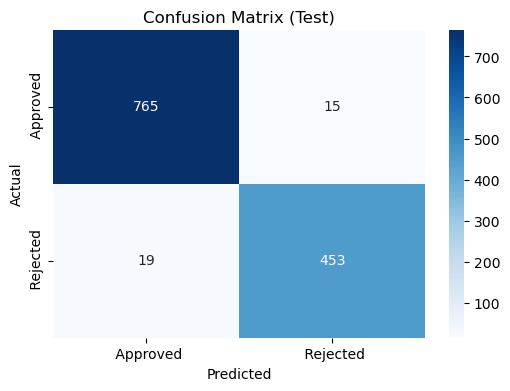

In [889]:
#Confusion Metrix
cm=confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=pipeline.classes_, 
            yticklabels=pipeline.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test)")
plt.show()

In [885]:
#Compairing Metrics
metrics_comparasion = pd.DataFrame({
    "metrics":["Accuracy", "Precision", "Recall", "F1 Score"],
    "Logistic Regression":[acc_lr_test,pr_lr_test,rec_lr_test,f1_lr_test],
    "Decision Tree":[acc_dt_test,pr_dt_test,rec_dt_test,f1_dt_test],
    "Random Forest":[acc_rf_test,pr_rf_test,rec_rf_test,f1_rf_test]
})
metrics_comparasion

,metrics,Logistic Regression,Decision Tree,Random Forest
0,Accuracy,0.914537,0.976837,0.972843
1,Precision,0.914340,0.976821,0.972818
2,Recall,0.914537,0.976837,0.972843
3,F1 Score,0.914408,0.976812,0.972820


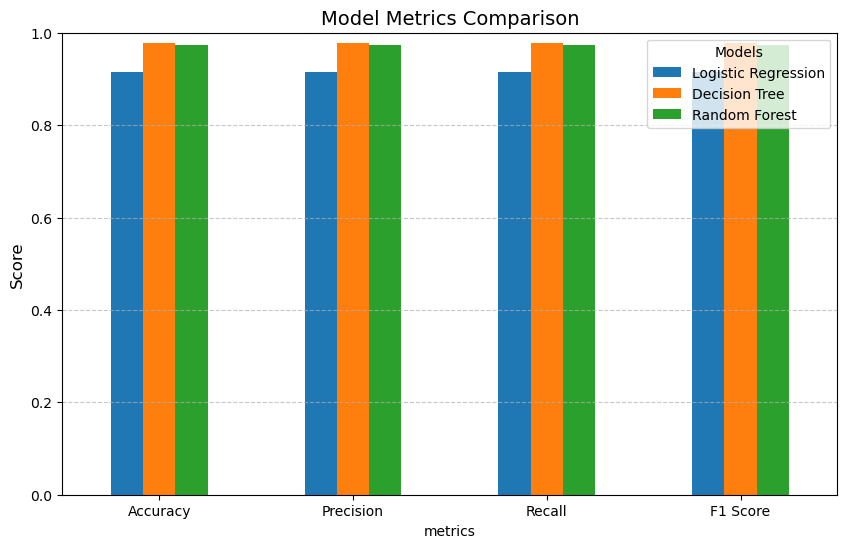

In [883]:
#Metrics Comparasion Plot
metrics_comparasion.set_index("metrics").plot(
    kind="bar", figsize=(10, 6)
)

plt.title("Model Metrics Comparison", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Models")
plt.show()


### We trained and tested three classification models: Logistic Regression, Decision Tree, and Random Forest. Among these, Logistic Regression achieved the lowest accuracy (91.45%), while Decision Tree (97.68%) and Random Forest (97.28%) performed significantly better. Since the Decision Tree achieved the highest accuracy, it is selected as the best-performing model for making further predictions.

In [881]:
#Saving Model
joblib.dump(dt_pipeline,"Best Model.pkl")

['Best Model.pkl']

In [879]:
def predict_loan():
    print("Enter Applicant Details:\n")
    #Inputs
    no_of_dependents = int(input("Number of Dependents: "))
    education = input("Education (Graduate/Not Graduate): ").strip().lower()
    self_employed = input("Self Employed (Yes/No): ").strip().lower()
    income_annum = float(input("Annual Income: "))
    loan_amount = float(input("Loan Amount: "))
    loan_term = int(input("Loan Term (in months): "))
    cibil_score = int(input("CIBIL Score: "))
    residential_assets_value = float(input("Residential Assets Value: "))
    commercial_assets_value = float(input("Commercial Assets Value: "))
    luxury_assets_value = float(input("Luxury Assets Value: "))
    bank_asset_value = float(input("Bank Asset Value: "))
    
   #Input Data
    input_data = pd.DataFrame([{
        "no_of_dependents": no_of_dependents,
        "education": education,
        "self_employed": self_employed,
        "income_annum": income_annum,
        "loan_amount": loan_amount,
        "loan_term": loan_term,
        "cibil_score": cibil_score,
        "residential_assets_value": residential_assets_value,
        "commercial_assets_value": commercial_assets_value,
        "luxury_assets_value": luxury_assets_value,
        "bank_asset_value": bank_asset_value
    }])
    model=joblib.load("Best Model.pkl")
    
    # Predict loan status
    prediction = model.predict(input_data)[0]
    #Results
    print("\n Predicted Loan Status:", prediction)
    return prediction

    

In [877]:
predict_loan()

Enter Applicant Details:



Number of Dependents:  0
Education (Graduate/Not Graduate):  not graduate
Self Employed (Yes/No):  yes
Annual Income:  	4100000
Loan Amount:  	12200000
Loan Term (in months):  8
CIBIL Score:  417
Residential Assets Value:  	2700000
Commercial Assets Value:  	2200000
Luxury Assets Value:  	8800000
Bank Asset Value:  3300000



 Predicted Loan Status:  Rejected


' Rejected'